In [1]:
# Increase width of the cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
os.chdir('J:\Chomiak_Python\Chomiak_Notebooks\Siberia_Data')
print(os.getcwd())
import numpy as np
import pandas as pd
pd.set_option('mode.use_inf_as_na', True)

# Plotting (x,y) with MatPlotLib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
plt.style.use("default") # notebook, paper, poster
# Plotting Tick Marks # https://matplotlib.org/stable/api/ticker_api.html
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator

# Plotting (x(t),y(t))
import datetime
from datetime import timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
years  =  mdates.YearLocator()
months =  mdates.MonthLocator()
days   =  mdates.DayLocator()
year_name = DateFormatter("%Y")
month_name = DateFormatter("%b")
day_name = DateFormatter('%d')

# Statistics/Regression Models (SciPy)
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, Data, RealData

# Prohibit Warnings ()
import warnings 
warnings.filterwarnings('ignore')
###################################################################################################

J:\Chomiak_Python\Chomiak_Notebooks\Siberia_Data


# AGRO Discharge (1936 - 2022)

In [2]:
# Name File
AGRO4_Q = 'AGRO_Yenisey_Discharge_2023.txt'
# Import File (.txt) and preprocess data
dfq = (pd.read_csv(AGRO4_Q, delim_whitespace=True, parse_dates=[4], index_col=[4], na_values=['NA', 'A', '', 'P'])
       .rename(columns=str.strip)  # Remove excess spaces from Column Text
       .rename(columns={"discharge": "q_m3/s"})  # Rename Discharge Column
       .drop(columns=['river', 'agency', 'station_code', 'station_name', 'flag']))  # Drop Unused Columns
       
print('   dfq       @ ', dfq.shape)        # Total

# Reformat Dates: Add columns for YYYY,MM,DD)
dfq['Date'] = dfq.index
dfq['year'] = pd.DatetimeIndex(dfq.index).year
dfq['month'] = pd.DatetimeIndex(dfq.index).month
dfq['day'] = pd.DatetimeIndex(dfq.index).day

# Reformat Date: Add 'month_day' column with format 1900-MM-DD)
dfq['month_day'] = dfq['Date'].dt.strftime('%m-%d')
dfq['month_day'] = pd.to_datetime(dfq['month_day'],format='%m-%d',errors='coerce')
dfq['month_'] = dfq['Date'].dt.strftime('%m')
dfq['month_'] = pd.to_datetime(dfq['month_'],format='%m',errors='coerce')

# Drop Day Column
dfq = dfq.drop(columns='day')

#dfq

   dfq       @  (31983, 1)


### Unit Conversions

- 1 [km3] = 10**9 [m3]
- 1 [d] = 86400 [s]
- 1 [y] = 31557600 [s]
- 1 [Pg] = 10**12 [kg]

### Freshwater Density Assumption for Mass Export
- V [m3] * 999.82 [kg/m3]

In [3]:
# Convert from [m3/s] to [km3/s]
dfq['q_km3/s'] = (dfq['q_m3/s']) * (1/(10**9))
dfq['q_km3/d'] = (dfq['q_km3/s']) * (86400)
dfq['q_km3/y'] = (dfq['q_m3/s']) * (1/(10**9)) * (86400) * (365.25) 

# Convert Volume Export to Mass Export (Assume FW Density = 999.82 [kg/m3])
dfq['m_kg/s'] = (dfq['q_m3/s']) * (999.82) 
dfq['m_kg/d'] = (dfq['m_kg/s']) * (86400)
dfq['m_kg/y'] = (dfq['q_m3/s']) * (999.82)  * (86400) * (365.25) 

# 1 Pg = 10**12 kg
dfq['m_Pg/d'] = (dfq['m_kg/d']) * (10**-12)
dfq['m_Pg/y'] = (dfq['m_kg/y']) * (10**-12)

dfq.head(1)

,q_m3/s,Date,year,month,month_day,month_,q_km3/s,q_km3/d,q_km3/y,m_kg/s,m_kg/d,m_kg/y,m_Pg/d,m_Pg/y
date,,,,,,,,,,,,,,
1936-01-01,4210.0,1936-01-01,1936,1,1900-01-01,1900-01-01,0.000004,0.363744,132.857496,4209242.2,3.636785e+11,1.328336e+14,0.363679,132.833582


### Remove Impartial Data (< 2023)

In [4]:
# Remove 2023 Data
dfq = dfq.truncate(after='2022-12-31') 

# Plot 1 @ Multi-Decadal

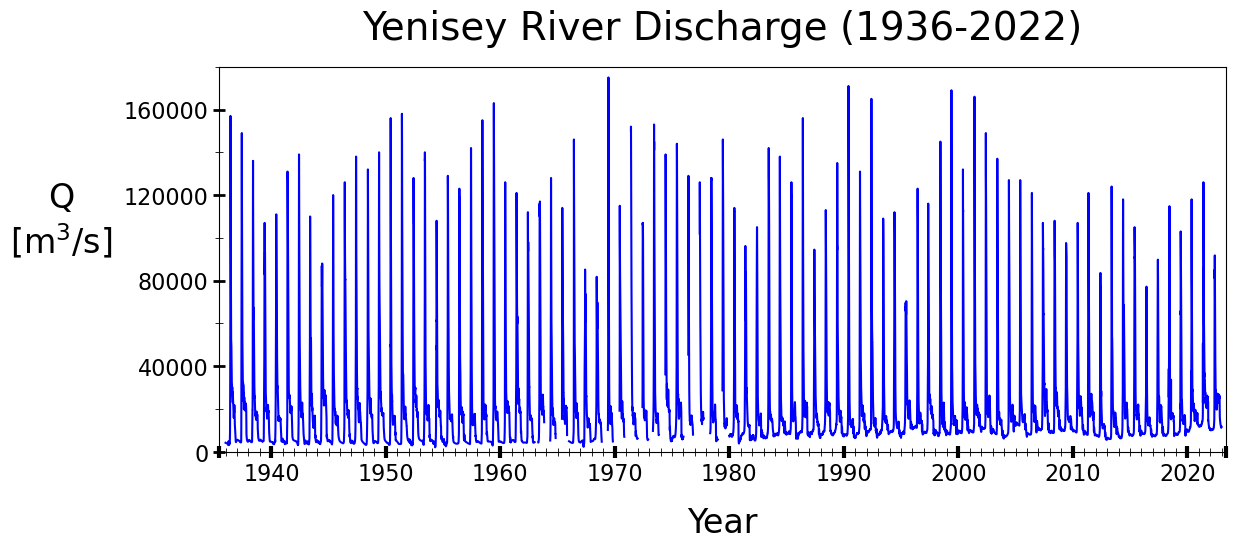

In [5]:
# Plot
fig, ax = plt.subplots(figsize=(13,5))
dfq['q_m3/s'].plot(ax=ax, color='blue')
ax.set_xlabel('Year', fontsize=24, labelpad=15)
ax.set_ylabel('Q\n[m$^3$/s]', fontsize=24, labelpad=45, rotation=0)
ax.set_title('Yenisey River Discharge (1936-2022)', fontsize=28, y=1.05)
ax.set_xlim([datetime.date(1935,6,1),datetime.date(2023,6,1)])
ax.set_ylim(0,180000)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout',length=8, labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)
ax.xaxis.set_minor_locator(mdates.YearLocator())
ax.xaxis.set_tick_params(which='major', direction='inout',length=8, labelsize=16, width=3)
ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)
#ax.grid(axis='x', color='black', alpha=0.08)
#fig.tight_layout(pad=2)

fig.savefig('AGRO_Yenisey_Q_1.png', dpi = 600, bbox_inches='tight')

In [6]:
# Loop over each group of year and month
for (year, month), group in dfq.groupby([dfq.index.year, dfq.index.month]):

    # Check if the month and year correspond to February of a leap year
    if month == 2 and year % 4 == 0:
        # Check if February 29th is present in the group
        if '02-29' in group.index.strftime('%m-%d').tolist():
            # Calculate the mean discharge for February 28th and 29th
            feb_28_29_mean = group.loc['{}-02-28'.format(year):'{}-02-29'.format(year), 'q_m3/s'].mean()

            # Assign the mean value to February 28th
            dfq.loc['{}-02-28'.format(year), 'q_m3/s'] = feb_28_29_mean

# Now remove February 29th entries
dfq = dfq[~((dfq.index.month == 2) & (dfq.index.day == 29))]

In [7]:
# Calculate the number of NaN values in each column
nan_counts = dfq.isna().sum()

# Print the number of NaN values in each column
print(nan_counts)

# If you want to see the total number of NaN values across the entire DataFrame
total_nan_values = dfq.isna().sum().sum()
print(f"Total NaN values in the DataFrame: {total_nan_values}")

q_m3/s       2499
Date            0
year            0
month           0
month_day       0
month_          0
q_km3/s      2499
q_km3/d      2499
q_km3/y      2499
m_kg/s       2499
m_kg/d       2499
m_kg/y       2499
m_Pg/d       2499
m_Pg/y       2499
dtype: int64
Total NaN values in the DataFrame: 22491


In [8]:
# Find rows where 'month_day' is NaN
nan_month_day = dfq[dfq['month_day'].isna()]
# Display the rows with NaN values in 'month_day'
print(nan_month_day)

Empty DataFrame
Columns: [q_m3/s, Date, year, month, month_day, month_, q_km3/s, q_km3/d, q_km3/y, m_kg/s, m_kg/d, m_kg/y, m_Pg/d, m_Pg/y]
Index: []


In [9]:
# Stats
meanq = dfq['q_m3/s'].mean()
sdq = dfq['q_m3/s'].std()
maxq = dfq['q_m3/s'].max()
minq = dfq['q_m3/s'].min()
print()
print('Discharge =', "%.0f"%meanq, '±',"%.0f"%sdq, '[m3/s]')
print('Range =', "%.0f"%minq, '-',"%.0f"%maxq, '[m3/s]')
print()
# Stats
meanq = dfq['q_km3/y'].mean()
sdq = dfq['q_km3/y'].std()
maxq = dfq['q_km3/y'].max()
minq = dfq['q_km3/y'].min()
print('Discharge =', "%.0f"%meanq, '±',"%.0f"%sdq, '[km3/y]')
print('Range =', "%.0f"%minq, '-',"%.0f"%maxq, '[km3/y]')
print()
print('Shape =', dfq.shape)
print()


Discharge = 19629 ± 23879 [m3/s]
Range = 2080 - 175000 [m3/s]

Discharge = 619 ± 754 [km3/y]
Range = 66 - 5523 [km3/y]

Shape = (31755, 14)



In [10]:
# Check for missing values
missing_data = dfq['q_m3/s'].isna()
# Calculate the number of missing values
missing_count = missing_data.sum()
missing_count

2499

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature Engineering: Creating a 'day_of_year' feature for seasonality
dfq['day_of_year'] = dfq.index.dayofyear

# Prepare the dataset for training
# Remove rows with missing target values
dfq_complete = dfq.dropna(subset=['q_m3/s'])

# Select features and target
X = dfq_complete[['year', 'day_of_year']]  # Features
y = dfq_complete['q_m3/s']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = rf_model.predict(X_test)

# Calculate the mean squared error for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test_sqrt = mse_test ** 0.5  # Root mean squared error

mse_test_sqrt

3996.7701841564663

In [12]:
# Identify the missing values in the original dataframe
missing_values_index = dfq[dfq['q_m3/s'].isna()].index

# Prepare the features for the missing values
X_missing = pd.DataFrame(index=missing_values_index)
X_missing['year'] = X_missing.index.year
X_missing['day_of_year'] = X_missing.index.dayofyear

# Predict the missing values using the trained model
predicted_missing_values = rf_model.predict(X_missing)

# Fill in the missing values in the original dataframe with the predictions
dfq.loc[dfq['q_m3/s'].isna(), 'q_m3/s'] = predicted_missing_values

# Now we can check if there are any missing values left
remaining_missing = dfq['q_m3/s'].isna().sum()

# Show the number of remaining missing values and a portion of the dataframe to verify
remaining_missing, dfq.loc[missing_values_index].head()

(0,
             q_m3/s       Date  year  month  month_day     month_  q_km3/s  \
 date                                                                        
 1963-01-01  4256.5 1963-01-01  1963      1 1900-01-01 1900-01-01      NaN   
 1963-01-02  4253.1 1963-01-02  1963      1 1900-01-02 1900-01-01      NaN   
 1963-01-03  4250.3 1963-01-03  1963      1 1900-01-03 1900-01-01      NaN   
 1963-01-04  4250.1 1963-01-04  1963      1 1900-01-04 1900-01-01      NaN   
 1963-01-05  4250.0 1963-01-05  1963      1 1900-01-05 1900-01-01      NaN   
 
             q_km3/d  q_km3/y  m_kg/s  m_kg/d  m_kg/y  m_Pg/d  m_Pg/y  \
 date                                                                   
 1963-01-01      NaN      NaN     NaN     NaN     NaN     NaN     NaN   
 1963-01-02      NaN      NaN     NaN     NaN     NaN     NaN     NaN   
 1963-01-03      NaN      NaN     NaN     NaN     NaN     NaN     NaN   
 1963-01-04      NaN      NaN     NaN     NaN     NaN     NaN     NaN   
 1963-01-0

In [13]:
# Check for missing values
missing_data = dfq['q_m3/s'].isna()
# Calculate the number of missing values
missing_count = missing_data.sum()
missing_count

0

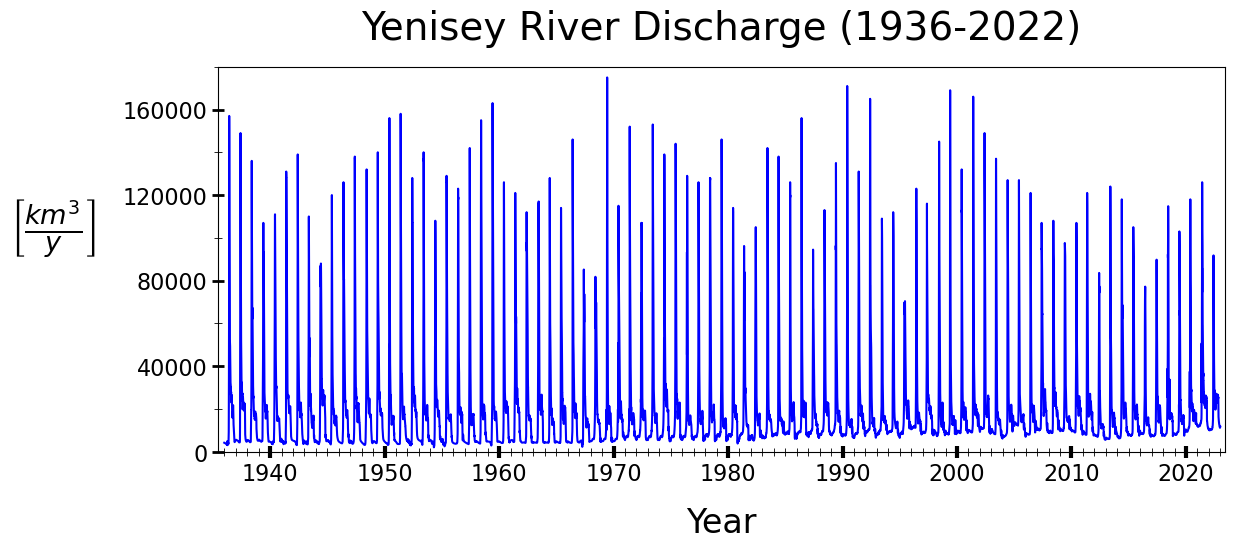

In [14]:
# Plot
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(dfq.index, dfq['q_m3/s'], color='blue')
ax.set_xlabel('Year', fontsize=24, labelpad=15)
ax.set_ylabel(r'$\left[\frac{ km^{3} }{ y } \right]$', fontsize=28, labelpad=50, rotation=0)

ax.set_title('Yenisey River Discharge (1936-2022)', fontsize=28, y=1.05)
ax.set_xlim([datetime.date(1935,6,1),datetime.date(2023,6,1)])
ax.set_ylim(0,180000)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout',length=8, labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)
ax.xaxis.set_minor_locator(mdates.YearLocator())
ax.xaxis.set_tick_params(which='major', direction='inout',length=8, labelsize=16, width=3)
ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)
#ax.grid(axis='x', color='black', alpha=0.08)
#fig.tight_layout(pad=2)

fig.savefig('AGRO_Yenisey_Q_1a.png', dpi = 600, bbox_inches='tight')

In [15]:
# Stats
meanq = dfq['q_m3/s'].mean()
sdq = dfq['q_m3/s'].std()
maxq = dfq['q_m3/s'].max()
minq = dfq['q_m3/s'].min()
print()
print('Discharge =', "%.0f"%meanq, '±',"%.0f"%sdq, '[m3/s]')
print('Range =', "%.0f"%minq, '-',"%.0f"%maxq, '[m3/s]')
print()
# Stats
meanq = dfq['q_km3/y'].mean()
sdq = dfq['q_km3/y'].std()
maxq = dfq['q_km3/y'].max()
minq = dfq['q_km3/y'].min()
print('Discharge =', "%.0f"%meanq, '±',"%.0f"%sdq, '[km3/y]')
print('Range =', "%.0f"%minq, '-',"%.0f"%maxq, '[km3/y]')
print()
print('Shape =', dfq.shape)
print()


Discharge = 18677 ± 23212 [m3/s]
Range = 2080 - 175000 [m3/s]

Discharge = 619 ± 754 [km3/y]
Range = 66 - 5523 [km3/y]

Shape = (31755, 15)



<br><br><br>

# Annual Groupby

<br><br><br>

In [16]:
###################################################################################################
# Annual-Averaged Groupby (Mean, Mean, Max, Min)
dfq_annual = dfq.groupby(dfq['year']).mean()
dfq_annual_sd = dfq.groupby(dfq['year']).std()
dfq_annual_max = dfq.groupby(dfq['year']).max()
dfq_annual_min = dfq.groupby(dfq['year']).min()
dfq_annual_sum = dfq.groupby(dfq['year']).sum()

# Create columns for Statistical Data 
dfq_annual['q_mean'] = dfq_annual['q_km3/y']
dfq_annual['q_sd'] = dfq_annual_sd['q_km3/y']
dfq_annual['q_max'] = dfq_annual_max['q_km3/y']
dfq_annual['q_min'] = dfq_annual_min['q_km3/y']
dfq_annual['q_sum'] = dfq_annual_sum['q_km3/y']
#dfq_annual['m_mean'] = dfq_annual['m_kg/y']#dfq_annual['m_sd'] = dfq_annual_sd['m_kg/y']#dfq_annual['m_max'] = dfq_annual_max['m_Pg/y']#dfq_annual['m_min'] = dfq_annual_min['m_kg/y']#dfq_annual['m_sum'] = dfq_annual_sum['m_Pg/y']

# Set dtype to datetime[ns]
dfq_annual.index = pd.to_datetime(dfq_annual.index, format='%Y',errors='coerce')
dfq_annual_max.index = pd.to_datetime(dfq_annual.index, format='%Y',errors='coerce')
dfq_annual_min.index = pd.to_datetime(dfq_annual.index, format='%Y',errors='coerce')
dfq_annual_sum.index = pd.to_datetime(dfq_annual.index, format='%Y',errors='coerce')

# Add Numerical Column for Year
dfq_annual['yr'] = np.arange(1936, 1936+len(dfq_annual.index), 1)
dfq_annual['n'] = np.arange(0, len(dfq_annual.index),1)

# Remove
dfq_annual = dfq_annual.truncate(after='2022-12-31') 
dfq_annual['year'] = pd.DatetimeIndex(dfq_annual.index).year

# Add SD boundaries
dfq_annual['Q_sd_neg'] = dfq_annual['q_m3/s'] - dfq_annual['q_sd']
dfq_annual['Q_sd_pos'] = dfq_annual['q_m3/s'] + dfq_annual['q_sd']


# Output
print()
print('   dfq       @ ', dfq.shape)        # Total
print('dfq_annual   @ ', dfq_annual.shape) # Annual
print()


   dfq       @  (31755, 15)
dfq_annual   @  (87, 21)



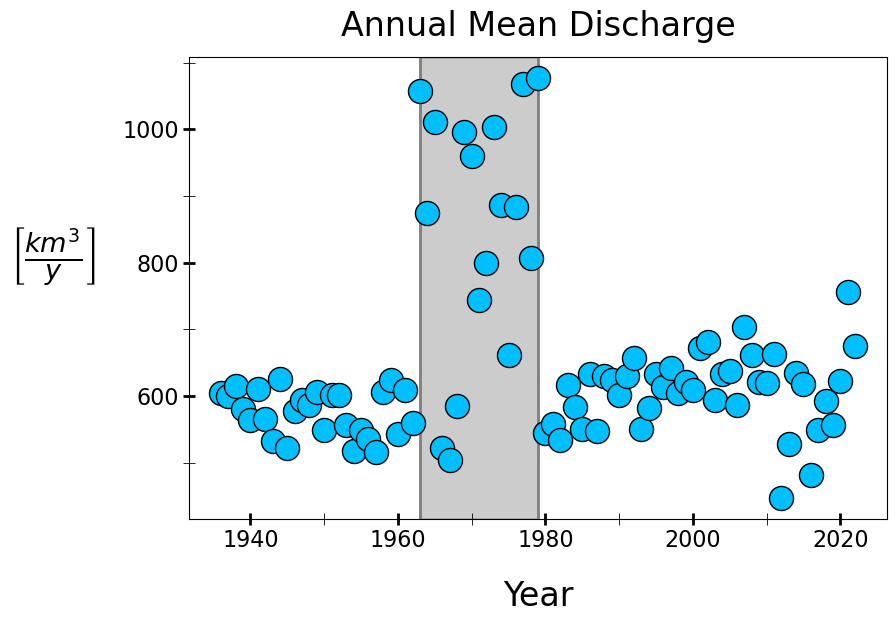

In [17]:
fig, ax = plt.subplots(figsize=(9,6))
#ax.plot(dfq_annual.yr, dfq_annual['q_km3/y'], c = 'black', lw=1, ls='-',label='Obs', zorder=1)
ax.scatter(dfq_annual.yr, dfq_annual['q_km3/y'], edgecolor='black', color='deepskyblue', s=300, lw=1, zorder=2)
ax.set_title('Annual Mean Discharge', fontsize=24, c='black', pad=15)
ax.set_ylabel(r'$\left[\frac{ km^{3} }{ y } \right]$', fontsize=28, labelpad=50, rotation=0)

ax.set_xlabel('Year', fontsize=24, c='black', labelpad=20)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.xaxis.set_tick_params(which='major', direction='inout', length=8,labelsize=16, width=2)
ax.xaxis.set_tick_params(which='minor', direction='inout', length=8, labelsize=16)
ax.yaxis.set_tick_params(which='major', direction='inout', length=8,labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout', length=8, labelsize=16)
#ax.set_ylim(400,800)
ax.axvline(1963, lw=2, ls='-', c='grey', zorder=0)
ax.axvline(1979, lw=2, ls='-', c='grey', zorder=0)
ax.axvspan(1963, 1979, lw=2, color='grey', zorder=0, alpha=0.4)
#ax.axhline(dfq_annual['q_km3/y'].mean(), lw=1, ls='--', c='grey', zorder=0)
#ax.grid(color='black', alpha=0.05)
#ax.text(0.28, 0.9, 'Q$_{mean}$  =  619 [km$^3$/y]', fontsize=18, ha='center', va='center',transform=ax.transAxes)
#ax.text(0.15, 0.9, 'Q$_{mean}$', fontsize=18, ha='center', va='center',transform=ax.transAxes)
#ax.text(0.15, 0.8, '619 [km$^3$/y]', fontsize=18, ha='center', va='center',transform=ax.transAxes)
fig.savefig('AGRO_Yenisey_Q_Annual_0.png', dpi = 500, bbox_inches='tight')

#  Notes:

> From 1960 to 1980 there are very high values relative to the remainder of the data. I was thinking this could be cause by nuclear testing, but the testing sites where in Khazakistan or Novaya Zemlya. I found some information on the major hydropower plants and their instillation years. Perhaps this could be related to the high values. 

<br><br>

#### Source:

- https://www.nsenergybusiness.com/features/russias-top-five-hydroelectric-power-plants-profiled/
- https://www.intechopen.com/chapters/53816

<br><br>

####  Sayano-Shushenskaya hydroelectric power plant (52.825833, 91.370278)
> The biggest hydropower plant in Russia, as well as one of the world’s top 10, the Sayano-Shushenskaya hydroelectric power plant is located on the Yenisei River in Sayanogorsk, Khakassia. The dam was constructed between 1963 and 1978 and is owned and operated by RusHydro (the world’s second-largest hydroelectric power producer). The power station’s 1,066m-long and 242m-high arch-gravity dam, has an installed capacity of 6.4GW — with 10 Francis hydro turbines each having a capacity of 640MW —producing 23.5 terawatt-hours (TWh) per annum, of which 70% is channeled to four aluminium smelters in Siberia. After suffering severe damage in a 2009 accident, Sayano-Shushenskaya returned to its regular production capacity in 2014 following extensive restoration and modernisation.

<br><br>

#### Krasnoyarsk Hydroelectric Power Station (55.934722, 92.293611)
Built between 1956 and 1972, Russia’s second-largest hydro-power plant, the 6.0 gigawatt (GW) Krasnoyarsk dam is located on the Yenisei River in Divnogorsk, 30km from Krasnoyarsk city. Operated by JSC Krasnoyarsk HPS, the hydropower station produces 18.4TWh of power annually, with most of it supplied to the RUSAL-owned Krasnoyarsk smelter.

The Krasnoyarsk power station includes a 1,065m-long and 124m-high gravity-type concrete dam, housing 12 Francis-type generating units with a capacity of 500MW each. The power plant also has the only ship lift in Russia, with the lift platform moving along an electric rack railway with the track gauge measuring nine metres — the widest-gauge railway in the world.

<br><br>

#### Bratsk Hydroelectric Power Plant (56.286111, 101.786111)
Located near Bratsk city on the Angara River in Irkutsk Oblast, south-eastern Siberia, the 4.5GW Bratsk hydroelectric power plant is a 124.5m-height and 924m-wide concrete gravity dam constructed between 1954 and 1961. Owned and operated by Irkutskenergo, it began operations in 1967 and generates 22.6TWh every year.

The Bratsk hydropower project also has a powerhouse comprising 18 Francis hydro turbines made by Leningrad Metal Works, each with a capacity of 250MW.

The top of the dam has a road for vehicles and the track of the Taishet-Lena railway line. Although the Angara does not have any shipping routes — and therefore no navigational channels — there is scope in the project to assemble a ship elevator.

<br><br>

#### Ust-Ilimsk Hydroelectric Power Station (57.967778, 102.693611)
With an installed capacity of 3.8GW, the Ust-Ilimsk hydroelectric power plant is the fourth-largest hydropower station in Russia and generates 21.7TWh of electricity annually. Also located in the Irkutsk Oblast, near Ust-Ilimsk on the Angara River, this power station was built between 1963 and 1980 and is owned and operated by Irkutskenergo.

The powerhouse is a concrete gravity dam 1,475m-long and 105m-high. It comprises 16 Francis hydro turbines, each possessing a capacity of 240MW. Adjoining the powerplant are two earth-fill auxiliary dams that were constructed as part of the hydroelectric power project. The Ust-Ilimsk power plant can hold two more turbines, which could reportedly raise its installed capacity to 4.3GW.

#### The Boguchany hydroelectric plant (58.694722, 99.148889)
The Boguchany Dam, located on the Angara River in Kodinsk near Krasnoyarsk Krai is the fifth-largest hydropower plant in Russia. Built, owned and operated by JSC Boguchanskaya GES (a joint venture of Rusal and RusHydro), the 3.0GW power station generates an average of 17.6TWh of electricity per annum with the help of nine Francis hydro turbines, each having a capacity of 333MW.

Fully operational after the ninth generator was installed in 2015, the plant’s power is mostly routed to the Boguchany Aluminium Smelter, towards the Evenkiya region for the development of natural resources (including forests and other mineral deposits) and to tackle power shortages in Siberia.

### Remove Data (< 1980)

In [18]:
dfq= dfq.truncate(before='1980-01-01') 
dfq_annual = dfq_annual.truncate(before='1980-01-01') 

In [19]:
# Stats
meanq = dfq['q_m3/s'].mean()
sdq = dfq['q_m3/s'].std()
maxq = dfq['q_m3/s'].max()
minq = dfq['q_m3/s'].min()
print()
print('Discharge =', "%.0f"%meanq, '±',"%.0f"%sdq, '[m3/s]')
print('Range =', "%.0f"%minq, '-',"%.0f"%maxq, '[m3/s]')
print()
# Stats
meanq = dfq['q_km3/y'].mean()
sdq = dfq['q_km3/y'].std()
maxq = dfq['q_km3/y'].max()
minq = dfq['q_km3/y'].min()
print('Discharge =', "%.0f"%meanq, '±',"%.0f"%sdq, '[km3/y]')
print('Range =', "%.0f"%minq, '-',"%.0f"%maxq, '[km3/y]')
print()
print('Shape =', dfq.shape)
print()


Discharge = 19233 ± 21795 [m3/s]
Range = 3850 - 171000 [m3/s]

Discharge = 607 ± 688 [km3/y]
Range = 121 - 5396 [km3/y]

Shape = (15695, 15)



In [20]:
dfq_2020_2022 = dfq.truncate(before='2020-01-01') 
dfq_2020_2022['q_km3/y'].mean()

684.5235388273973

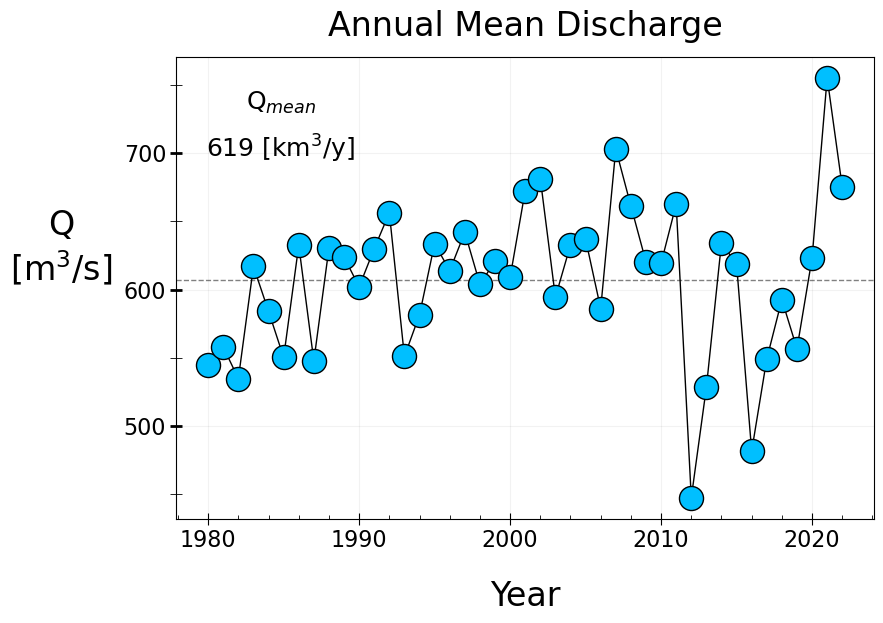

In [21]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(dfq_annual.yr, dfq_annual['q_km3/y'], c = 'black', lw=1, ls='-',label='Obs', zorder=1)
ax.scatter(dfq_annual.yr, dfq_annual['q_km3/y'], edgecolor='black', color='deepskyblue', s=300, lw=1, zorder=2)
ax.set_title('Annual Mean Discharge', fontsize=24, c='black', pad=15)
ax.set_ylabel('Q\n[m$^3$/s]', fontsize=24, labelpad=45, rotation=0)
ax.set_xlabel('Year', fontsize=24, c='black', labelpad=20)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.xaxis.set_tick_params(direction='inout',length=8, labelsize=16)
ax.xaxis.set_tick_params(which='minor', direction='in', length=3)
ax.yaxis.set_tick_params(which='major', direction='inout', length=8,labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout', length=8, labelsize=16)
#ax.set_ylim(400,800)
ax.axhline(dfq_annual['q_km3/y'].mean(), lw=1, ls='--', c='grey', zorder=0)
#ax.axvline(1963, lw=2, ls='-', c='grey', zorder=0)
#ax.axvline(1979, lw=2, ls='-', c='grey', zorder=0)
ax.grid(color='black', alpha=0.05)
#ax.text(0.28, 0.9, 'Q$_{mean}$  =  619 [km$^3$/y]', fontsize=18, ha='center', va='center',transform=ax.transAxes)
ax.text(0.15, 0.9, 'Q$_{mean}$', fontsize=18, ha='center', va='center',transform=ax.transAxes)
ax.text(0.15, 0.8, '619 [km$^3$/y]', fontsize=18, ha='center', va='center',transform=ax.transAxes)
fig.savefig('AGRO_Yenisey_Q_Annual.png', dpi = 500, bbox_inches='tight')

y = 0.727*x + -847.965


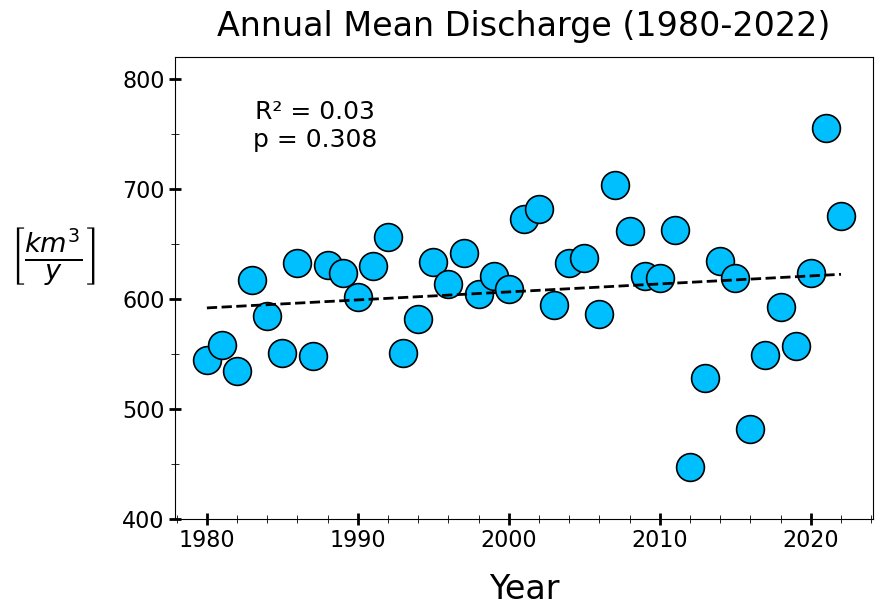

In [22]:
# Assuming 'year' and 'q_m3/s' are your independent and dependent variables, respectively.
X = dfq_annual[['year']]  # Independent variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = dfq_annual['q_km3/y']  # Dependent variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract R-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the slope (not the intercept)

# Add the modeled values for plotting
dfq_annual['model'] = model.fittedvalues

# Print the summary of the regression
#model.summary()

# Extract coefficients
a_opt = model.params['year']
b_opt = model.params['const']

# Format the regression equation with consistent decimal places
regression_eq = f"y = {a_opt:.3f}*x + {b_opt:.3f}"
print(regression_eq) 

# Set Plot
fig, ax = plt.subplots(figsize=(9,6))

# Plot observed data
ax.scatter(dfq_annual['year'], dfq_annual['q_km3/y'], 
           c='deepskyblue', edgecolor='black', lw=1.2, s=400, zorder=1)

# Plot modeled data
ax.plot(dfq_annual['year'], dfq_annual['model'], lw=2, ls='--', c='black')

# Set labels and title
ax.set_xlabel('Year', fontsize=24, labelpad=15)
ax.set_ylabel(r'$\left[\frac{ km^{3} }{ y } \right]$', fontsize=28, labelpad=50, rotation=0)

ax.set_title('Annual Mean Discharge (1980-2022)', fontsize=24, c='black', pad=15)

# Set x-axis and y-axis limits and ticks
ax.set_ylim(400, 820)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(5))
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.xaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)

# Add R-squared and p-value to the plot
ax.text(0.20, 0.85, f"R\u00b2 = {r_squared:.2f}\np = {p_value:.3f}", fontsize=18, color='black', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)


fig.savefig('AGRO_Yenisey_Annual_Regression_1.png', dpi = 500, bbox_inches='tight')

# Divide the data based on the DAMN

In [23]:
dfq_annual['year'] = pd.DatetimeIndex(dfq_annual.index).year

In [24]:
# divide the DataFrame into two parts based on the date
date_threshold = pd.to_datetime('2011-12-31')

In [25]:
df_before = dfq_annual.loc[dfq_annual.index <= date_threshold]
df_after = dfq_annual.loc[dfq_annual.index > date_threshold]

In [26]:
# df_before = df_before.dropna()

In [27]:
df_before.tail(3)

,q_m3/s,month,q_km3/s,q_km3/d,q_km3/y,m_kg/s,m_kg/d,m_kg/y,m_Pg/d,m_Pg/y,...,q_sd,q_max,q_min,q_sum,yr,n,year,Q_sd_neg,Q_sd_pos,model
year,,,,,,,,,,,,,,,,,,,,,
2009-01-01,19656.986301,6.526027,0.000020,1.698364,620.327311,1.965345e+07,1.698058e+12,6.202157e+14,1.698058,620.215652,...,622.733481,3080.02176,302.952960,226419.468480,2009,73,2009,19034.252820,20279.719782,612.759185
2010-01-01,19622.136986,6.526027,0.000020,1.695353,619.227550,1.961861e+07,1.695047e+12,6.191161e+14,1.695047,619.116089,...,571.222819,3376.66320,251.198496,226018.055808,2010,74,2010,19050.914168,20193.359805,613.486275
2011-01-01,20995.808219,6.526027,0.000021,1.814038,662.577317,2.099203e+07,1.813711e+12,6.624581e+14,1.813711,662.458054,...,739.929224,3818.46960,239.837760,241840.720872,2011,75,2011,20255.878995,21735.737443,614.213365


# (1980-2011)
- Discharge increases 2.723 [km/y] per year

y = 2.723*x + -4820.5


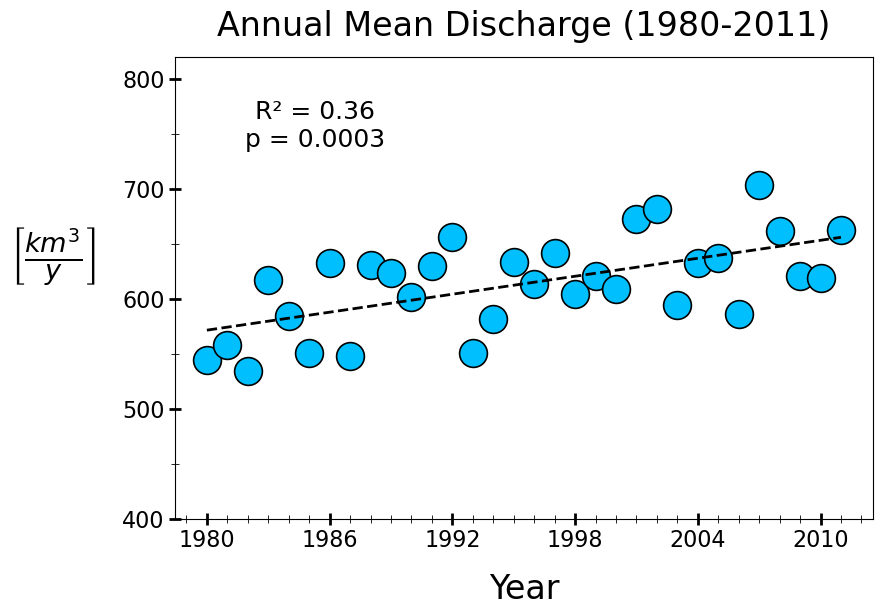

In [28]:
# Assuming 'year' and 'q_m3/s' are your independent and dependent variables, respectively.
X = df_before[['year']]  # Independent variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_before['q_km3/y']  # Dependent variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract R-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the slope (not the intercept)

# Add the modeled values for plotting
df_before['model'] = model.fittedvalues

# Print the summary of the regression
#model.summary()

# Extract coefficients
a_opt = model.params['year']
b_opt = model.params['const']
# Format the regression equation
regression_eq = f"y = {a_opt:.3f}*x + {b_opt:.1f}"
print(regression_eq) 

# Set Plot
fig, ax = plt.subplots(figsize=(9,6))

# Plot observed data
ax.scatter(df_before['year'], df_before['q_km3/y'], 
           c='deepskyblue', edgecolor='black', lw=1.2, s=400, zorder=1)

# Plot modeled data
ax.plot(df_before['year'], df_before['model'], lw=2, ls='--', c='black')

# Set labels and title
ax.set_xlabel('Year', fontsize=24, labelpad=15)
ax.set_ylabel(r'$\left[\frac{ km^{3} }{ y } \right]$', fontsize=28, labelpad=50, rotation=0)

ax.set_title('Annual Mean Discharge (1980-2011)', fontsize=24, c='black', pad=15)

# Set x-axis and y-axis limits and ticks
ax.set_ylim(400, 820)
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.xaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)

# Add R-squared and p-value to the plot
ax.text(0.20, 0.85, f"R\u00b2 = {r_squared:.2f}\np = {p_value:.4f}", fontsize=18, color='black', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

fig.savefig('AGRO_Yenisey_Annual_Regression_2.png', dpi = 500, bbox_inches='tight')

# (2012-2022)
- Discharge increases 18.2 [km/y] per year

y = 18.196*x + -36113.1


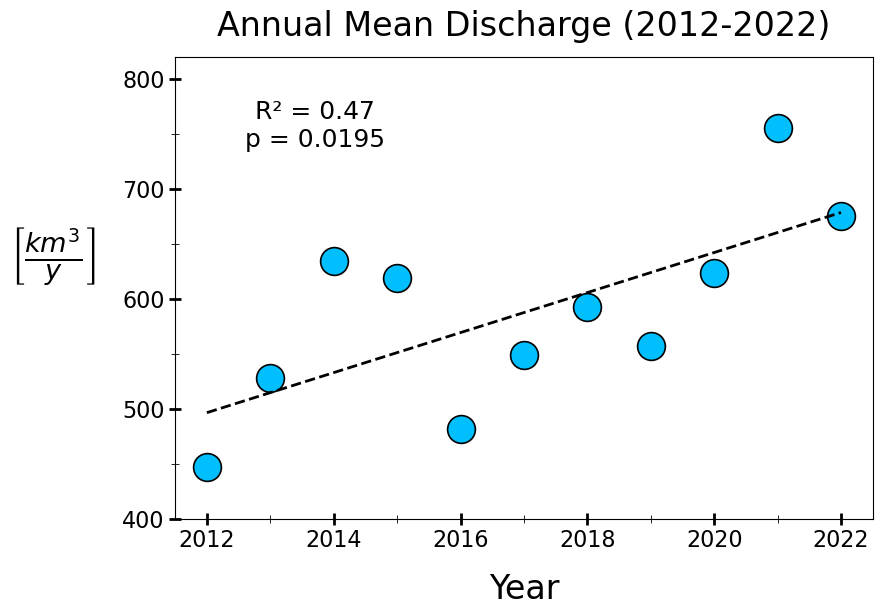

In [29]:
# Assuming 'year' and 'q_m3/s' are your independent and dependent variables, respectively.
X = df_after[['year']]  # Independent variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_after['q_km3/y']  # Dependent variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract R-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the slope (not the intercept)

# Add the modeled values for plotting
df_after['model'] = model.fittedvalues

# Print the summary of the regression
#model.summary()

# Extract coefficients
a_opt = model.params['year']
b_opt = model.params['const']
# Format the regression equation
regression_eq = f"y = {a_opt:.3f}*x + {b_opt:.1f}"
print(regression_eq) 

# Set Plot
fig, ax = plt.subplots(figsize=(9,6))

# Plot observed data
ax.scatter(df_after['year'], df_after['q_km3/y'], c='deepskyblue', edgecolor='black', lw=1.2, s=400, zorder=1)
# Plot modeled data
ax.plot(df_after['year'], df_after['model'], lw=2, ls='--', c='black')

# Set labels and title
ax.set_xlabel('Year', fontsize=24, labelpad=15)
ax.set_ylabel(r'$\left[\frac{ km^{3} }{ y } \right]$', fontsize=28, labelpad=50, rotation=0)

ax.set_title('Annual Mean Discharge (2012-2022)', fontsize=24, c='black', pad=15)

# Set x-axis and y-axis limits and ticks
ax.set_ylim(400, 820)
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.xaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)

# Add R-squared and p-value to the plot
ax.text(0.20, 0.85, f"R\u00b2 = {r_squared:.2f}\np = {p_value:.4f}", fontsize=18, color='black', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

fig.savefig('AGRO_Yenisey_Annual_Regression_3.png', dpi = 500, bbox_inches='tight')

# Combined

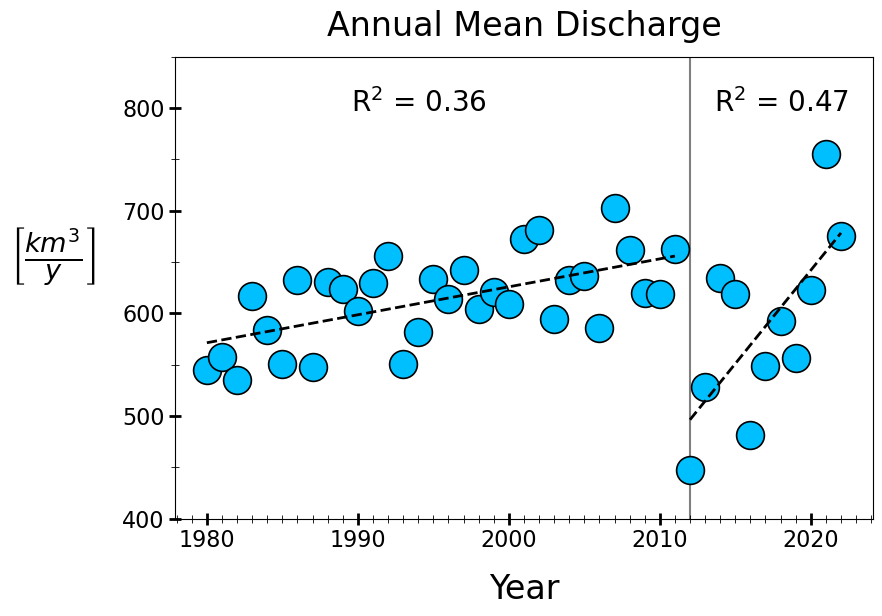

In [30]:
# Plot
fig, ax = plt.subplots(figsize=(9,6))

# Plot observed data
ax.scatter(df_before['year'], df_before['q_km3/y'], c='deepskyblue', edgecolor='black', lw=1.2, s=400, zorder=1)
# Plot modeled data
ax.plot(df_before['year'], df_before['model'], lw=2, ls='--', c='black')

# Plot observed data
ax.scatter(df_after['year'], df_after['q_km3/y'], c='deepskyblue', edgecolor='black', lw=1.2, s=400, zorder=1)
# Plot modeled data
ax.plot(df_after['year'], df_after['model'], lw=2, ls='--', c='black')

# Set labels and title
ax.set_xlabel('Year', fontsize=24, labelpad=15)
ax.set_ylabel(r'$\left[\frac{ km^{3} }{ y } \right]$', fontsize=28, labelpad=50, rotation=0)

ax.set_title('Annual Mean Discharge', fontsize=24, c='black', pad=15)

# Set x-axis and y-axis limits and ticks
ax.set_ylim(400, 850)
ax.axvline(2012, lw=1.5, ls='-', c='grey', zorder=0)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.xaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)

ax.text(0.35, 0.90, rf"R$^2$ = 0.36", fontsize=20, color='black',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
ax.text(0.87, 0.90, rf"R$^2$ = 0.47", fontsize=20, color='black',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

fig.savefig('AGRO_Yenisey_Annual_Regression_4.png', dpi = 500, bbox_inches='tight')

# Say average discharge of xxx over the last decade (2000-2022) compared to a xxx from 1980-1990

In [31]:
# Create a dictionary with years as keys and dataframes as values
yearly_data = {year: data.drop('year', axis=1) for year, data in dfq.groupby(dfq.index.year)}

# Now you have a dictionary where you can access each year's data with yearly_data[year]
# For example, to access the data for the year 2000:
#data_2000 = yearly_data[2000]

In [32]:
# Calculate the average discharge for the year 1980 and 2022
average_discharge_1980 = yearly_data[1980]['q_km3/y'].mean()
average_discharge_2022 = yearly_data[2022]['q_km3/y'].mean()

print(f"The average discharge for the year 1980 is: {average_discharge_1980:.0f} km^3/year")
print(f"The average discharge for the year 2022 is: {average_discharge_2022:.0f} km^3/year")

The average discharge for the year 1980 is: 544 km^3/year
The average discharge for the year 2022 is: 675 km^3/year


# Dictionary

In [33]:
# Get unique years from the DateTimeIndex
unique_years = dfq.index.year.unique()

# Create a dictionary with years as keys and dataframes as values
all_data = {year: dfq[dfq.index.year == year] for year in unique_years}

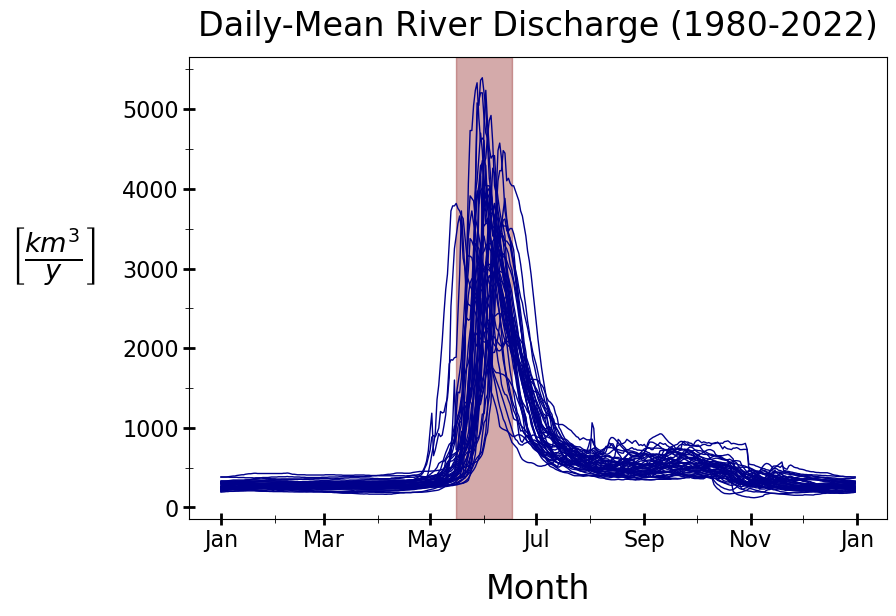

In [38]:
# Plot
fig, ax = plt.subplots(figsize=(9,6))

# Plot each year's data
for year in unique_years:
    # Select the data for the year
    data = all_data[year]
    # Plot the data
    ax.plot(data['month_day'], data['q_km3/y'], lw=1, color='darkblue')

# Set labels and title
ax.set_title('Daily-Mean River Discharge (1980-2022)', fontsize=24, c='black', pad=15)

ax.set_xlabel('Month', fontsize=24, labelpad=15)
ax.set_ylabel(r'$\left[\frac{ km^{3} }{ y } \right]$', fontsize=28, labelpad=50, rotation=0)
# Set x-axis and y-axis limits and ticks
ax.xaxis.set_major_formatter(month_name)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.xaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)

#ax.axvline(pd.Timestamp('1900-05-16'), color='maroon', lw=1, ls='--', zorder=0)
#ax.axvline(pd.Timestamp('1900-06-17'), color='maroon', lw=1, ls='--', zorder=0)
ax.axvspan(pd.Timestamp('1900-05-16'),pd.Timestamp('1900-06-17'), color='maroon', alpha=0.333, zorder=0)

fig.savefig('AGRO_Yenisey_Q_All_liens.png', dpi = 600, bbox_inches='tight')

In [40]:
import matplotlib.cm as cm

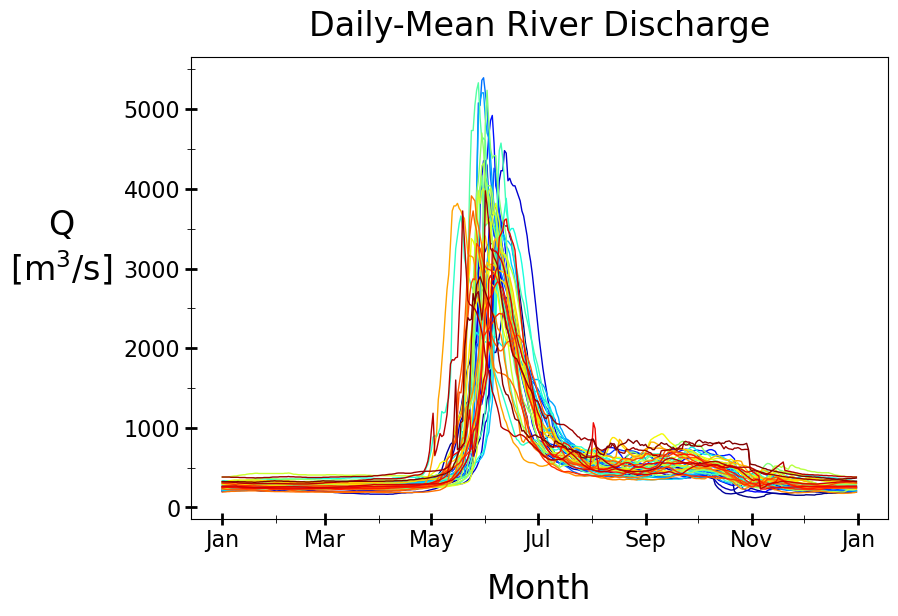

In [41]:
# Plot
fig, ax = plt.subplots(figsize=(9,6))


# Set up the colormap
years = sorted(dfq.index.year.unique())
colors = cm.jet(np.linspace(0, 1, len(years)))  # Generates a list of colors from the colormap

# Plot each year's data with a color from the colormap
for i, year in enumerate(years):
    data = yearly_data[year]
    plt.plot(data['month_day'], data['q_km3/y'], label=str(year), color=colors[i], lw=1)


# Set labels and title
ax.set_xlabel('Month', fontsize=24, labelpad=15)
ax.set_ylabel('Q\n[m$^3$/s]', fontsize=24, labelpad=45, rotation=0)
ax.set_title('Daily-Mean River Discharge', fontsize=24, c='black', pad=15)

# Set x-axis and y-axis limits and ticks
ax.xaxis.set_major_formatter(month_name)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.xaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)

### Notes
- Get the day of the maximum discharge for each year.

<br><br><br><br><br><br>

# Daily Groupby

<br><br><br><br><br><br>

In [42]:
min_Q_dfq = dfq['q_m3/s'].min()

###################################################################################################
# Daily-Averaged Groupby (Mean, Mean, Max, Min) 
dfq_daily = dfq.groupby(dfq['month_day']).mean() # mean
dfq_daily_sd = dfq.groupby(dfq['month_day']).std() # sd = standard deviation
dfq_daily_max = dfq.groupby(dfq['month_day']).max() # max = maximum
dfq_daily_min = dfq.groupby(dfq['month_day']).min() # min = minimum
dfq_daily_sum = dfq.groupby(dfq['month_day']).sum() # sum = sum

# Create columns for Statistical Data 
dfq_daily['q_sd'] = dfq_daily_sd['q_m3/s'] # sd = standard deviation
dfq_daily['q_max'] = dfq_daily_max['q_m3/s'] # max = maximum
dfq_daily['q_min'] = dfq_daily_min['q_m3/s'] # min = minimum
dfq_daily['q_sum'] = dfq_daily_sum['q_m3/s'] # sum = sum
dfq_daily['m_sd'] = dfq_daily_sd['q_m3/s'] # sd = standard deviation

dfq_daily['Q_sd_neg'] = dfq_daily['q_m3/s'] - dfq_daily['q_sd']
dfq_daily['Q_sd_pos'] = dfq_daily['q_m3/s'] + dfq_daily['q_sd']

# Make values below a lower limit be changes to the minimum of the main dataset
dfq_daily['Q_sd_neg'] = dfq_daily['Q_sd_neg'].where(dfq_daily['Q_sd_neg'] >= min_Q_dfq, min_Q_dfq)
dfq_daily['Q_sd_pos'] = dfq_daily['Q_sd_pos'].where(dfq_daily['Q_sd_pos'] >= min_Q_dfq, min_Q_dfq)

# Define Upper and Lower Limits assuming a 95% confidence interval
dfq_daily['lower'] = dfq_daily['q_m3/s'] - 1.96 * dfq_daily['q_sd'] 
dfq_daily['upper'] = dfq_daily['q_m3/s'] + 1.96 * dfq_daily['q_sd']

# Make values below a lower limit be changes to the minimum of the main dataset
dfq_daily['lower'] = dfq_daily['lower'].where(dfq_daily['lower'] >= min_Q_dfq, min_Q_dfq)
dfq_daily['upper'] = dfq_daily['upper'].where(dfq_daily['upper'] >= min_Q_dfq, min_Q_dfq)

# Specify the timespan
timespan = pd.date_range('1900-04-15', '1900-07-01')

# Find the minimum value of Q_sd_neg between April 1st to April 15th
min_Q_sd_neg = dfq_daily.loc['1900-04-01':'1900-05-08', 'Q_sd_neg'].min()
min_q_min = dfq_daily.loc['1900-04-01':'1900-05-08', 'q_min'].min()

# Check the condition and update the values
dfq_daily.loc[timespan, 'Q_sd_neg'] = np.where(dfq_daily.loc[timespan, 'Q_sd_neg'] < min_Q_sd_neg, min_Q_sd_neg, dfq_daily.loc[timespan, 'Q_sd_neg'])
dfq_daily.loc[timespan, 'q_min'] = np.where(dfq_daily.loc[timespan, 'q_min'] < min_q_min, min_q_min, dfq_daily.loc[timespan, 'q_min'])

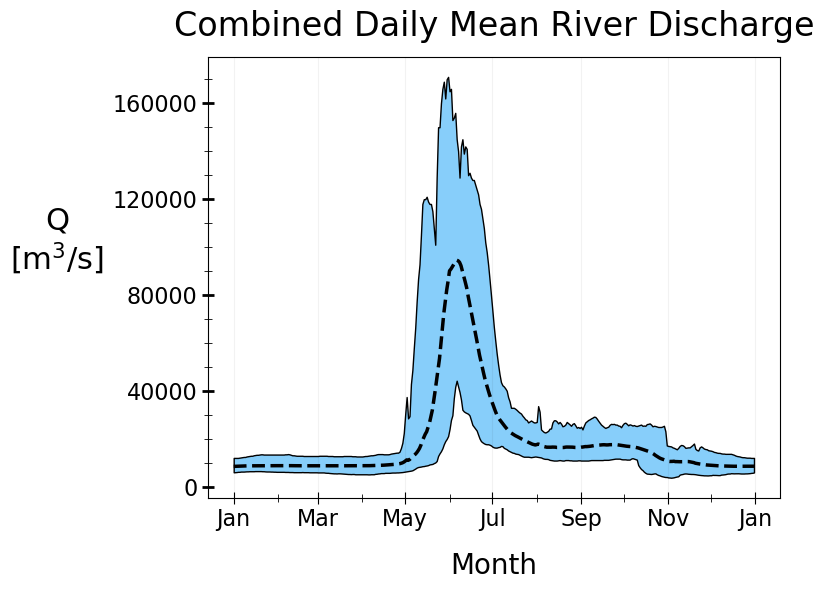

In [43]:
# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dfq_daily.index, dfq_daily['q_m3/s'], c='black', lw=2.5, ls='--', zorder=3)

#ax.fill_between(dfq_daily.index, dfq_daily['lower'], dfq_daily['upper'], label="95% CI", color="deepskyblue", edgecolor="black", lw=1, alpha=1, ls='-', zorder=2)

ax.fill_between(dfq_daily.index, dfq_daily['q_max'], dfq_daily['q_min'], color="lightskyblue", edgecolor="black", lw=1, alpha=1, zorder=0)


ax.set_title('Combined Daily Mean River Discharge', fontsize=24, c='black', pad=15)
ax.set_ylabel('Q\n[m$^3$/s]', fontsize=22, c='black', labelpad=40, rotation=0)
ax.set_xlabel('Month', fontsize=20, c='black', labelpad=15)
ax.xaxis.set_major_formatter(month_name)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_tick_params(direction='inout',length=8,labelsize=16)
ax.xaxis.set_tick_params(which='minor', direction='inout',length=6)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(4))
ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)
#ax.axvline(pd.Timestamp('1900-05-01'), color='red', lw=1.5, ls='--', zorder=0)
#ax.axvline(pd.Timestamp('1900-07-01'), color='red', lw=1.5, ls='--', zorder=0)
ax.grid(axis='x', color='black', alpha=0.05)
fig.tight_layout()

fig.savefig('AGRO_Yenisey_Daily_Q2.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# Monthly and Daily Groupby

<br><br><br><br><br><br>

In [44]:
###################################################################################################
# Monthly-Averaged Groupby (Mean, Mean, Max, Min)
dfq_monthly = dfq.groupby(dfq['month_']).mean()
dfq_monthly_sd = dfq.groupby(dfq['month_']).std()
dfq_monthly_max = dfq.groupby(dfq['month_']).max()
dfq_monthly_min = dfq.groupby(dfq['month_']).min()
dfq_monthly_sum = dfq.groupby(dfq['month_']).sum()

# Create columns for Statistical Data 
dfq_monthly['q_sd'] = dfq_monthly_sd['q_m3/s']
dfq_monthly['q_max'] = dfq_monthly_max['q_m3/s']
dfq_monthly['q_min'] = dfq_monthly_min['q_m3/s']
dfq_monthly['q_sum'] = dfq_monthly_sum['q_m3/s']
# Drop Unused Columns
#dfq_monthly = dfq_monthly.drop(columns={'year','day'})
dfq_monthly = dfq_monthly.drop(columns='year')

###################################################################################################

# Define Upper and Lower Limits assuming a 95% confidence interval
dfq_monthly['lower'] = dfq_monthly['q_m3/s'] - 1.96 * dfq_monthly['q_sd'] 
dfq_monthly['upper'] = dfq_monthly['q_m3/s'] + 1.96 * dfq_monthly['q_sd']

# Make values below a lower limit be changes to the minimum of the main dataset
dfq_monthly['lower'] = dfq_monthly['lower'].where(dfq_monthly['lower'] >= min_Q_dfq, min_Q_dfq)
dfq_monthly['upper'] = dfq_monthly['upper'].where(dfq_monthly['upper'] >= min_Q_dfq, min_Q_dfq)

# Specify the timespan
timespan = pd.date_range('1900-04-15', '1900-07-01')



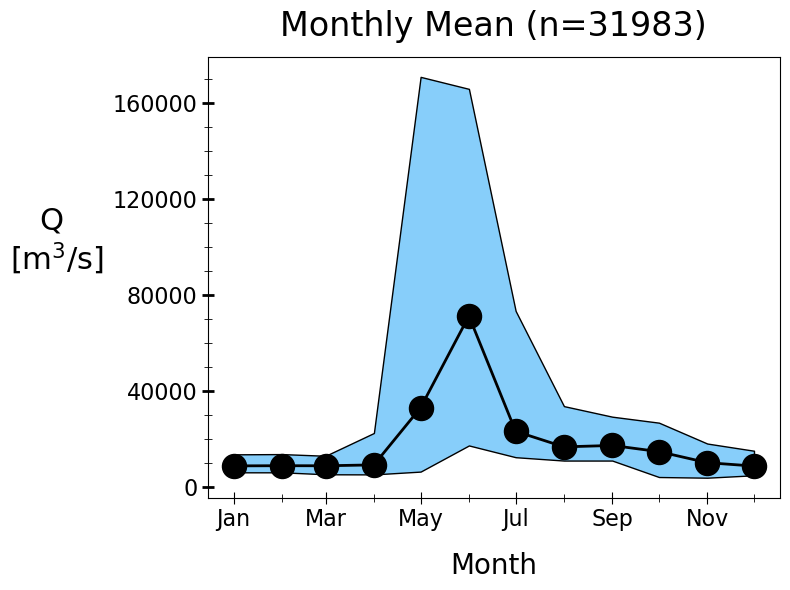

In [45]:
# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dfq_monthly.index, dfq_monthly['q_m3/s'], c='black', ls='-' , linewidth=2, zorder=2)
ax.scatter(dfq_monthly.index , dfq_monthly['q_m3/s'], c='black', edgecolor='black', lw=1, s=300, zorder=3)

#ax.fill_between(dfq_monthly.index, dfq_monthly['lower'], dfq_monthly['upper'], label="95% CI", 
#                color="deepskyblue", edgecolor="black", lw=1, alpha=1, ls='--', zorder=2)

ax.fill_between(dfq_monthly.index, dfq_monthly['q_max'], dfq_monthly['q_min'], color="lightskyblue", edgecolor="black", lw=1, alpha=1, zorder=0)


ax.set_title('Monthly Mean (n=31983)', fontsize=24, c='black', pad=15)
ax.set_ylabel('Q \n[m$^3$/s]', fontsize=22, c='black', labelpad=40, rotation=0)
ax.set_xlabel('Month', fontsize=20, c='black', labelpad=15)
ax.xaxis.set_major_formatter(month_name)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_tick_params(direction='inout',length=8,labelsize=16)
ax.xaxis.set_tick_params(which='minor', direction='inout',length=6)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(4))
ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)
#ax.axvline(pd.Timestamp('1900-04-01'), color='red', lw=1.5, ls='--', zorder=0)
#ax.axvline(pd.Timestamp('1900-07-01'), color='red', lw=1.5, ls='--', zorder=0)
#ax.axvline(pd.Timestamp('1900-09-21'), color='gold', lw=1.5, ls='--', zorder=0)
#ax.axvline(pd.Timestamp('1900-12-21'), color='blue', lw=1.5, ls='--', zorder=0)
#ax.grid(axis='x', color='black', alpha=0.05)
fig.tight_layout()

fig.savefig('AGRO_Yenisey_Monthly_Q2.png', dpi = 500, bbox_inches='tight')

# Derivative (Rate of Change)

In [46]:
sdf = pd.DataFrame()
sdf.index = dfq_daily.index
sdf['q_m3/s'] = dfq_daily['q_m3/s']
sdf['derivative'] = dfq_daily['q_m3/s'].diff()
sdf['derivative_lower'] = dfq_daily['lower'].diff()
sdf['derivative_upper'] = dfq_daily['upper'].diff()

maxsfd = sdf['derivative'].max()
minsdf = sdf['derivative'].min()
print('Range =', "%.0f"%minsdf, '-',"%.0f"%maxsfd, '[m3/s*d]')
print()

Range = -3405 - 6879 [m3/s*d]



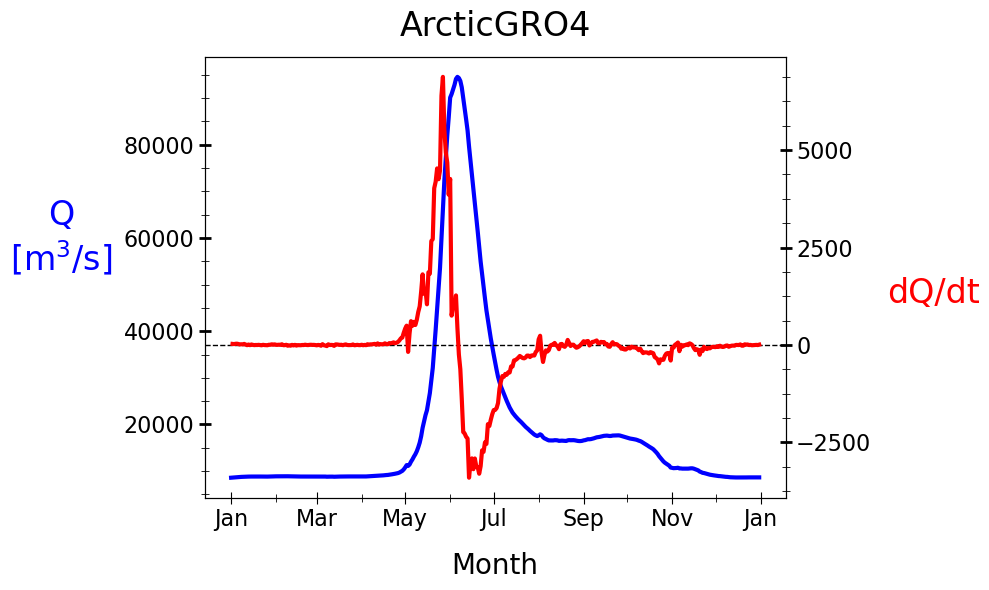

In [47]:
# Plot
fig, ax = plt.subplots(figsize=(10,6))
ax1 = ax.twinx()
ax.plot(dfq_daily.index, dfq_daily['q_m3/s'], c='blue', lw=3, ls='-', zorder=3)
ax.set_title('ArcticGRO4', fontsize=24, c='black', pad=15)
ax.set_xlabel('Month', fontsize=20, c='black', labelpad=15)
ax.set_ylabel('Q\n[m$^3$/s]', fontsize=24, labelpad=45, rotation=0, color='blue')

ax.xaxis.set_major_formatter(month_name)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_tick_params(direction='inout',length=8,labelsize=16)
ax.xaxis.set_tick_params(which='minor', direction='inout',length=6)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(4))
ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

ax1.plot(sdf.index, sdf['derivative'], c='red', lw=3, ls='-', zorder=3)
ax1.set_ylabel('dQ/dt', fontsize=24, labelpad=45, rotation=0, color='red')
ax1.yaxis.set_major_locator(MaxNLocator(5))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator(4))
ax1.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
ax1.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)
ax1.axhline(0, color='black', lw=1, ls='--', zorder=0)

ax1.xaxis.set_major_formatter(month_name)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_tick_params(direction='inout',length=8,labelsize=16)
ax1.xaxis.set_tick_params(which='minor', direction='inout',length=6)

#ax.axvline(pd.Timestamp('1900-05-20'), color='black', lw=1.5, ls='--', zorder=0)
#ax.axvline(pd.Timestamp('1900-07-01'), color='black', lw=1.5, ls='--', zorder=0)
#ax.axvline(pd.Timestamp('1900-09-01'), color='black', lw=1.5, ls='--', zorder=0)



fig.tight_layout()

fig.savefig('AGRO_Yenisey_Q_Derivative_1.png', dpi = 500, bbox_inches='tight')

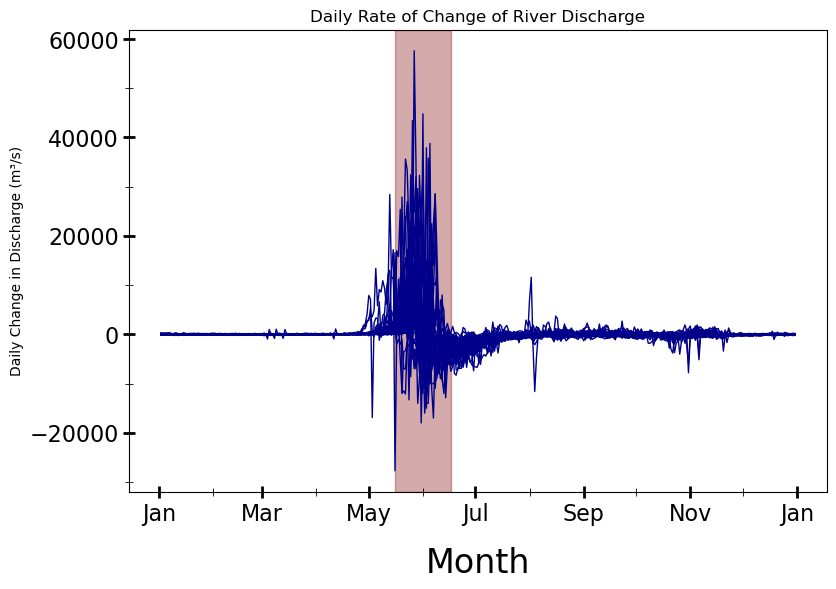

In [52]:
def plot_derivative_onset(all_data):
    fig, ax = plt.subplots(figsize=(9, 6))

    for year, df in all_data.items():
        # Calculate the daily rate of change
        df['discharge_diff'] = df['q_m3/s'].diff()

        # Plot the derivative
        ax.plot(df['month_day'], df['discharge_diff'], lw=1, color='darkblue')

    ax.set_xlabel('Month', fontsize=24, labelpad=15)
    ax.set_ylabel('Daily Change in Discharge (m³/s)')
    ax.set_title('Daily Rate of Change of River Discharge')
    #ax.legend(title="Year", loc='upper left', bbox_to_anchor=(1, 1))
    ax.xaxis.set_major_formatter(month_name)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)
    ax.yaxis.set_major_locator(MaxNLocator(6))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)
    ax.axvspan(pd.Timestamp('1900-05-16'),pd.Timestamp('1900-06-17'), color='maroon', alpha=0.333, zorder=0)
    plt.show()

# Call the function with your dictionary
plot_derivative_onset(all_data)

#fig.savefig('AGRO_Yenisey_Q_All_liens.png', dpi = 600, bbox_inches='tight')

# Date of Maximum Discharge

In [ ]:
dfq.columns

In [ ]:
# Initialize a list to store the data
max_discharge_rows = []

# Iterate over each year in the dictionary
for year, data in yearly_data.items():
    # Find the row with the maximum discharge for the year
    max_row = data.loc[data['q_km3/y'].idxmax()]
    # Add the year to the row
    max_row['Year'] = year
    # Append the row to the list
    max_discharge_rows.append(max_row)

# Convert the list to a DataFrame
df_max_discharge_rows = pd.DataFrame(max_discharge_rows)

# Reset the index if you prefer the DataFrame to have a default integer index
df_max_discharge_rows.reset_index(drop=True, inplace=True)

# Display the new DataFrame
#df_max_discharge_rows

In [ ]:
print(df_max_discharge_rows['Date'].min())
print(df_max_discharge_rows['Date'].max())
print()
print(df_max_discharge_rows['q_m3/s'].min().idx())
print(df_max_discharge_rows['q_m3/s'].max())

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_max_discharge_rows['Year'], df_max_discharge_rows['day_of_year'], c='black', ls='-' , linewidth=2, zorder=2)
ax.scatter(df_max_discharge_rows['Year'] , df_max_discharge_rows['day_of_year'], c='black', edgecolor='black', lw=1, s=300, zorder=3)

ax.set_title('Day of Max Discharge', fontsize=24, c='black', pad=15)
ax.set_ylabel('Day', fontsize=22, c='black', labelpad=40, rotation=0)
ax.set_xlabel('Year', fontsize=20, c='black', labelpad=15)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.xaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)

In [ ]:
X = df_max_discharge_rows[['Year']]  # Independent variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_max_discharge_rows['day_of_year']  # Dependent variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract R-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the slope (not the intercept)

# Add the modeled values for plotting
df_max_discharge_rows['model'] = model.fittedvalues

# Print the summary of the regression
#model.summary()

# Extract coefficients
a_opt = model.params['Year']
b_opt = model.params['const']
# Format the regression equation
regression_eq = f"y = {a_opt:.3f}*x + {b_opt:.1f}"
print(regression_eq) 

# Set Plot
fig, ax = plt.subplots(figsize=(9,6))

# Plot observed data
ax.scatter(df_max_discharge_rows['Year'], df_max_discharge_rows['day_of_year'], c='salmon', edgecolor='black', lw=1.2, s=300, zorder=1)
# Plot modeled data
ax.plot(df_max_discharge_rows['Year'], df_max_discharge_rows['model'], lw=2, ls='--', c='black')

# Set labels and title
ax.set_title('Day of Max Discharge', fontsize=24, c='black', pad=15)
ax.set_ylabel('Day', fontsize=22, c='black', labelpad=40, rotation=0)
ax.set_xlabel('Year', fontsize=20, c='black', labelpad=15)

# Set x-axis and y-axis limits and ticks
ax.set_ylim(132, 172)
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.xaxis.set_tick_params(which='minor', direction='in', length=4, labelsize=16)
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)

# Add R-squared and p-value to the plot
ax.text(0.17, 0.17, f"R\u00b2 = {r_squared:.2f}\np = {p_value:.4f}", fontsize=18, color='black', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

fig.savefig('AGRO_Yenisey_Q_dayof_max.png', dpi = 500, bbox_inches='tight')

In [ ]:
import seaborn as sns

# Define common properties for black edges
edge_black = dict(edgecolor='black')
whisker_cap_color = dict(color='black')
flier_color = dict(markeredgecolor='black')

fig, ax = plt.subplots(figsize=(9, 6))
dfq_monthly.index, dfq_monthly['q_km3/y']
sns.boxplot(x=dfq_monthly.index, y=dfq_monthly['q_km3/y'], ax=ax, width=0.5, 
            boxprops=edge_black, 
            whiskerprops=whisker_cap_color, 
            capprops=whisker_cap_color, 
            flierprops=flier_color)

#ax.set_title("Deionized Water Anomalies", fontsize=24)
ax.set_xlabel("Samples", fontsize=18, labelpad=15)
ax.tick_params(axis='x', rotation=0, labelsize=18)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=18)

ax.set_ylabel("DIC_uM", fontsize=16)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('DIC\n[μM]', fontsize=24, labelpad=50, rotation=0)
ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)

fig.suptitle('Potable Water', fontsize=28, x=0.5, y=0.95)

fig.tight_layout()

#fig.savefig('Chomiak_CRDS_Box_Plot_Potable_Water.png', dpi = 600, bbox_inches='tight')

In [ ]:
halt

<br><br><br><br><br><br>

# Water Export

<br><br><br><br><br><br>

In [ ]:
dfq_annual_sum.columns

In [ ]:
dfq_annual_sum.head(1)

In [ ]:
# Add Numerical Column for Year
dfq_annual_sum['yr'] = np.arange(1936, 1936+len(dfq_annual_sum.index), 1)
dfq_annual_sum['n'] = np.arange(0, len(dfq_annual_sum.index),1)

# Remove
dfq_annual_sum = dfq_annual_sum.truncate(after='2022-12-31') 
dfq_annual_sum['year'] = pd.DatetimeIndex(dfq_annual_sum.index).year

In [ ]:
dfq_annual_sum = dfq_annual_sum.truncate(before='1980-01-01') 
dfq_annual_sum.head(1)

In [ ]:
dfq_annual_sum.head(1)

In [ ]:
dfq_annual_sum.tail(1)

In [ ]:
halt

In [ ]:
# Assuming 'year' and 'q_m3/s' are your independent and dependent variables, respectively.
X = dfq_annual_sum[['year']]  # Independent variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = dfq_annual_sum['q_km3/y']  # Dependent variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract R-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the slope (not the intercept)

# Add the modeled values for plotting
dfq_annual_sum['model'] = model.fittedvalues

# Print the summary of the regression
#model.summary()

# Extract coefficients
a_opt = model.params['year']
b_opt = model.params['const']

# Format the regression equation with consistent decimal places
regression_eq = f"y = {a_opt:.3f}*x + {b_opt:.3f}"
print(regression_eq) 

# Set Plot
fig, ax = plt.subplots(figsize=(9,6))

# Plot observed data
ax.scatter(dfq_annual_sum['year'], dfq_annual_sum['q_km3/y'], 
           c='deepskyblue', edgecolor='black', lw=1.2, s=400, zorder=1)

# Plot modeled data
ax.plot(dfq_annual_sum['year'], dfq_annual_sum['model'], lw=2, ls='--', c='black')

# Set labels and title
ax.set_xlabel('Year', fontsize=24, labelpad=15)
ax.set_ylabel('Q\n[m$^3$/s]', fontsize=24, labelpad=45, rotation=0)
ax.set_title('Annual Mean Discharge', fontsize=24, c='black', pad=15)

# Set x-axis and y-axis limits and ticks
#ax.set_ylim(400, 820)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(5))
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.xaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)

# Add R-squared and p-value to the plot
ax.text(0.20, 0.85, f"R\u00b2 = {r_squared:.2f}\np = {p_value:.3f}", fontsize=18, color='black', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)




# Seasonal Export

In [ ]:
# Seasons
winter = pd.concat([dfq_daily.loc['1900-01-01':'1900-03-20'], dfq_daily.loc['1900-12-21':'1900-12-31']])
spring = dfq_daily.loc['1900-03-21':'1900-06-20']
summer = dfq_daily.loc['1900-06-21':'1900-09-20']
fall = dfq_daily.loc['1900-09-21':'1900-12-20']

# Counts (Q)
Q_winter_count = winter['q_km3/d'].count()
Q_spring_count = spring['q_km3/d'].count()
Q_summer_count = summer['q_km3/d'].count()
Q_fall_count = fall['q_km3/d'].count()

# Sum Q [km3/d]
Q_winter_sum = winter['q_km3/d'].sum() 
Q_spring_sum = spring['q_km3/d'].sum() 
Q_summer_sum = summer['q_km3/d'].sum() 
Q_fall_sum = fall['q_km3/d'].sum()

# Flux Q [km3/season]
Q_winter_sum_flux = Q_winter_sum * Q_winter_count
Q_spring_sum_flux = Q_spring_sum * Q_spring_count
Q_summer_sum_flux = Q_summer_sum * Q_summer_count
Q_fall_sum_flux = Q_fall_sum * Q_fall_count

# Mass Export [Pg/d]
m_winter_sum = winter['m_Pg/d'].sum() 
m_spring_sum = spring['m_Pg/d'].sum() 
m_summer_sum = summer['m_Pg/d'].sum() 
m_fall_sum = fall['m_Pg/d'].sum()

# Flux M [Pg/season]
m_winter_sum_flux = (m_winter_sum * Q_winter_count) 
m_spring_sum_flux = (m_spring_sum * Q_spring_count) 
m_summer_sum_flux = (m_summer_sum * Q_summer_count) 
m_fall_sum_flux = (m_fall_sum * Q_fall_count) 

sezn = pd.DataFrame()

sezn['season'] = ['Winter', 'Spring', 'Summer', 'Fall']

# Counts (n)
sezn['n_1'] = [Q_winter_count, Q_spring_count, Q_summer_count, Q_fall_count]

# Sum Q Discharge [km3/d]
sezn['sum_v1'] = [Q_winter_sum, Q_spring_sum, Q_summer_sum, Q_fall_sum]

# Mass Export [kg/d]
sezn['sum_m1'] = [m_winter_sum, m_spring_sum, m_summer_sum, m_fall_sum]

# Flux Q [km3/season]
sezn['Total_V_Out_1'] = [Q_winter_sum_flux, Q_spring_sum_flux, Q_summer_sum_flux, Q_fall_sum_flux]

# Flux M [Pg/season]
sezn['Total_m_Out_1'] = [m_winter_sum_flux, m_spring_sum_flux, m_summer_sum_flux, m_fall_sum_flux]

# Change Column Names
sezn.columns = [['season','n','sum_v_km3_d','sum_m_Pg_d', 'v_out_km3', 'm_out_Pg']]

# Display
sezn

In [ ]:
sezn['sum_v_km3_d']

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(9,6), sharey=True)

ax.plot(dfq_daily.index, dfq_daily['q_km3/d'], c='black', ls='--' , linewidth=2.8, label='q_km3/s')

ax.fill_between(dfq_daily.index, 
                dfq_daily['q_km3/d'] - dfq_daily_sd['q_km3/d'], 
                dfq_daily['q_km3/d'] + dfq_daily_sd['q_km3/d'], 
                color="deepskyblue", edgecolor="black", lw=1, alpha=1, zorder=1)

ax.fill_between(dfq_daily.index, 
                dfq_daily_min['q_km3/d'], 
                dfq_daily_max['q_km3/d'], 
                color="deepskyblue", edgecolor="black", lw=1, alpha=0.4, zorder=1)

ax.set_title('Seasonal Volume Export of River Water', fontsize=28, c='black', pad=15)

ax.set_xlabel('Month', fontsize=24, c='black', labelpad=15)
ax.xaxis.set_major_formatter(month_name)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_tick_params(direction='inout',length=8,labelsize=14)
ax.xaxis.set_tick_params(which='minor', direction='inout',length=6)

ax.set_ylabel('Volume Export \n[km$^3$]', fontsize=24, c='black', labelpad=15)
ax.set_ylim(0,17)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(4))
ax.yaxis.set_tick_params(direction='inout',length=8,labelsize=14)
ax.yaxis.set_tick_params(which='minor', direction='inout',length=4, labelsize=14)

ax.axvline(pd.Timestamp('1900-03-21'), color='green', lw=1.5, ls='--', zorder=0)
ax.axvline(pd.Timestamp('1900-06-21'), color='red', lw=1.5, ls='--', zorder=0)
ax.axvline(pd.Timestamp('1900-09-21'), color='chocolate', lw=1.5, ls='--', zorder=0)
ax.axvline(pd.Timestamp('1900-12-21'), color='blue', lw=1.5, ls='--', zorder=0)

ax.text(0.125, 0.93, '71 (55) km$^3$', fontsize=14, ha='center', va='center',transform=ax.transAxes, color='blue')
ax.text(0.36, 0.93, '278 (260) km$^3$', fontsize=14, ha='center', va='center',transform=ax.transAxes, color='green')
ax.text(0.59, 0.93, '169 (190) km$^3$', fontsize=14, ha='center', va='center',transform=ax.transAxes, color='red')
ax.text(0.82, 0.93, '103 (88) km$^3$', fontsize=14, ha='center', va='center',transform=ax.transAxes, color='chocolate')

#ax.text(0.1, 0.93, 'V$_{SUM}$   =', fontsize=14, ha='center', va='center',transform=ax.transAxes, color='black')

#fig.savefig('AGRO_Yenisey_Q_export_1.png', dpi = 500, bbox_inches='tight')

In [ ]:
sezn['m_out_Pg']

In [ ]:
# Subtract the Baseline Average
dfq_daily['MMM'] = dfq_daily['m_Pg/d'] - (winter['m_Pg/d'].mean())

# Subtract the Baseline Average from Each Daily Mean
winter['MMM'] = winter['m_Pg/d'] - (winter['m_Pg/d'].mean())
spring['MMM'] = spring['m_Pg/d'] - (winter['m_Pg/d'].mean())
summer['MMM'] = summer['m_Pg/d'] - (winter['m_Pg/d'].mean())
fall['MMM'] = fall['m_Pg/d'] - (winter['m_Pg/d'].mean())

In [ ]:
# Mass Export [Pg/d]
M_winter_sum = winter['MMM'].sum() 
M_spring_sum = spring['MMM'].sum() 
M_summer_sum = summer['MMM'].sum() 
M_fall_sum = fall['MMM'].sum()

# Flux M [Pg/season]
M_winter_sum_flux = (M_winter_sum * Q_winter_count) 
M_spring_sum_flux = (M_spring_sum * Q_spring_count) 
M_summer_sum_flux = (M_summer_sum * Q_summer_count) 
M_fall_sum_flux = (M_fall_sum * Q_fall_count) 

sezn['M_Pg_adj'] = [M_winter_sum_flux, M_spring_sum_flux, M_summer_sum_flux, M_fall_sum_flux]

sezn

In [ ]:
M_Pg_adj = []
M_Pg_adj = sezn['M_Pg_adj'].values
M_Pg_adj

In [ ]:
round(1.29896094e-13)

In [ ]:
round(1.87424525e+04)

In [ ]:
round(1.22694791e+04)

In [ ]:
round(2.90954470e+03)

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(8,5), sharey=True)

ax.plot(dfq_daily.index, dfq_daily['MMM'], c='blue', ls='-' , linewidth=2.8, label='New')
ax.plot(dfq_daily.index, dfq_daily['m_Pg/d'], c='black', ls='--', linewidth=2.0, label='Original')

ax.set_title('Water Discharge Corrected', fontsize=28, c='black', pad=15)
ax.set_ylabel('Vol Out [km$^3$/d]', fontsize=24, c='black', labelpad=15)
ax.set_xlabel('Month', fontsize=24, c='black', labelpad=15)

ax.xaxis.set_major_formatter(month_name)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_tick_params(direction='inout',length=8,labelsize=14)
ax.xaxis.set_tick_params(which='minor', direction='inout',length=6)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(4))
ax.yaxis.set_tick_params(direction='inout',length=8,labelsize=14)
ax.yaxis.set_tick_params(which='minor', direction='inout',length=4, labelsize=14)

ax.axvline(pd.Timestamp('1900-03-21'), color='green', lw=1.5, ls='-', zorder=0)
ax.axvline(pd.Timestamp('1900-06-21'), color='red', lw=1.5, ls='-', zorder=0)
ax.axvline(pd.Timestamp('1900-09-21'), color='chocolate', lw=1.5, ls='-', zorder=0)
ax.axvline(pd.Timestamp('1900-12-21'), color='blue', lw=1.5, ls='-', zorder=0)

ax.set_ylim(-0.5, 9.5)

ax.text(0.13, 0.93, '0 Pg', fontsize=14, ha='center', va='center',transform=ax.transAxes, color='blue')
ax.text(0.365, 0.93, '18251 Pg', fontsize=14, ha='center', va='center',transform=ax.transAxes, color='green')
ax.text(0.59, 0.93, '8992 Pg', fontsize=14, ha='center', va='center',transform=ax.transAxes, color='red')
ax.text(0.82, 0.93, '2740 Pg', fontsize=14, ha='center', va='center',transform=ax.transAxes, color='chocolate')

#fig.savefig('AGRO_Yenisey_Seasonal_M_Pg_adj.png', dpi = 500, bbox_inches='tight')

In [ ]:
halt

In [ ]:
# Stats
diw_DIC = diw['DIC_uM'].mean()
diw_DIC_SD = diw['DIC_uM'].std()
diw_iDIC = diw['iDIC'].mean()
diw_iDIC_SD = diw['iDIC'].std()
print('DIW @ DIC_uM =', "%.0f"%diw_DIC, '±',"%.1f"%diw_DIC_SD)
print('DIW @ iDIC =', "%.1f"%diw_iDIC, '±',"%.1f"%diw_iDIC_SD)
print('DIW @ Samples =', diw.shape)
print()
diw_DIC = diw_0['DIC_uM'].mean()
diw_DIC_SD = diw_0['DIC_uM'].std()
diw_iDIC = diw_0['iDIC'].mean()
diw_iDIC_SD = diw_0['iDIC'].std()
print('DIW_0 @ DIC_uM =', "%.0f"%diw_DIC, '±',"%.1f"%diw_DIC_SD)
print('DIW_0 @ iDIC =', "%.1f"%diw_iDIC, '±',"%.1f"%diw_iDIC_SD)
print('DIW_0 @ Samples =', diw_0.shape)
print()
# Stats (NaHCO3)
x_DIC, x_DIC_SD = nahco3['DIC_uM'].mean(), nahco3['DIC_uM'].std()
x_iDIC, x_iDIC_SD = nahco3['iDIC'].mean(), nahco3['iDIC'].std()
print('nahco3 @ DIC_uM =', "%.0f"%x_DIC, '±',"%.1f"%x_DIC_SD)
print('nahco3 @ iDIC =', "%.1f"%x_iDIC, '±',"%.1f"%x_iDIC_SD)
print('nahco3 @ Samples =', nahco3.shape)
print()
# Stats (MgCO3)
x_DIC, x_DIC_SD = mgco3['DIC_uM'].mean(), mgco3['DIC_uM'].std()
x_iDIC, x_iDIC_SD = mgco3['iDIC'].mean(), mgco3['iDIC'].std()
print('mgco3 @ DIC_uM =', "%.0f"%x_DIC, '±',"%.1f"%x_DIC_SD)
print('mgco3 @ iDIC =', "%.1f"%x_iDIC, '±',"%.1f"%x_iDIC_SD)
print('mgco3 @ Samples =', mgco3.shape)
print()

In [ ]:
# Color palette dictionary
color_dict = {'DIW': 'deepskyblue', 
              'DIW*': 'lightblue', 
              'Tap': 'lightgray', 
              'Fountain': 'lightgray', 
              'Inland': 'lime', 
              'Seawater': 'cadetblue',
              'NaHCO3':'peru',
              'MgCO3':'plum'} 

# Define common properties for black edges
edge_black = dict(edgecolor='black')
whisker_cap_color = dict(color='black')
flier_color = dict(markeredgecolor='black')

In [ ]:
# Combine
asd = pd.DataFrame()
asd = pd.concat([tw, fountain])

fig, ax = plt.subplots(1,2, figsize=(13, 6))

sns.boxplot(x=asd["Name"], y=asd["DIC_uM"], ax=ax[0], palette=color_dict, width=0.5, 
            boxprops=edge_black, 
            whiskerprops=whisker_cap_color, 
            capprops=whisker_cap_color, 
            flierprops=flier_color)

#ax[0].set_title("Deionized Water Anomalies", fontsize=24)
ax[0].set_xlabel("Samples", fontsize=18, labelpad=15)
ax[0].tick_params(axis='x', rotation=0, labelsize=18)
#ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', fontsize=18)

ax[0].set_ylabel("DIC_uM", fontsize=16)
ax[0].tick_params(axis='y', labelsize=18)
ax[0].set_ylabel('DIC\n[μM]', fontsize=24, labelpad=50, rotation=0)
ax[0].xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
ax[0].yaxis.set_major_locator(MaxNLocator(6))
ax[0].yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax[0].yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
ax[0].yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)

sns.boxplot(x=asd["Name"], y=asd["iDIC"], ax=ax[1], palette=color_dict, width=0.5, 
            boxprops=edge_black, 
            whiskerprops=whisker_cap_color, 
            capprops=whisker_cap_color, 
            flierprops=flier_color)

#ax[1].set_title("Deionized Water Anomalies", fontsize=24)
ax[1].set_xlabel("Samples", fontsize=18, labelpad=15)
ax[1].tick_params(axis='x', rotation=0, labelsize=18)
ax[1].tick_params(axis='y', labelsize=18)
ax[1].set_ylabel('$^{13}$C$_{DIC}$\n[‰]', fontsize=24, labelpad=50, rotation=0)
ax[1].xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
ax[1].yaxis.set_major_locator(MaxNLocator(6))
ax[1].yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax[1].yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
ax[1].yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

fig.suptitle('Potable Water', fontsize=28, x=0.5, y=0.95)

fig.tight_layout()

#fig.savefig('Chomiak_CRDS_Box_Plot_Potable_Water.png', dpi = 600, bbox_inches='tight')

In [ ]:
import seaborn as sns

# Define common properties for black edges
edge_black = dict(edgecolor='black')
whisker_cap_color = dict(color='black')
flier_color = dict(markeredgecolor='black')

fig, ax = plt.subplots(figsize=(9, 6))
dfq_monthly.index, dfq_monthly['q_m3/s']
sns.boxplot(x=dfq_monthly.index, y=dfq_monthly['q_m3/s'], ax=ax, width=0.5, 
            boxprops=edge_black, 
            whiskerprops=whisker_cap_color, 
            capprops=whisker_cap_color, 
            flierprops=flier_color)

#ax.set_title("Deionized Water Anomalies", fontsize=24)
ax.set_xlabel("Samples", fontsize=18, labelpad=15)
ax.tick_params(axis='x', rotation=0, labelsize=18)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=18)

ax.set_ylabel("DIC_uM", fontsize=16)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('DIC\n[μM]', fontsize=24, labelpad=50, rotation=0)
ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)

fig.suptitle('Potable Water', fontsize=28, x=0.5, y=0.95)

fig.tight_layout()

#fig.savefig('Chomiak_CRDS_Box_Plot_Potable_Water.png', dpi = 600, bbox_inches='tight')